<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Model saving and scripting


---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston
from sklearn.pipeline import Pipeline
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
import joblib
import pickle

## Load the data

In [3]:
data = load_boston()
X = data.data
y = data.target

## Construct pipeline

In [4]:
scaler = StandardScaler()
model = RidgeCV(alphas=np.logspace(-4, 4, 9), cv=5)
pipe = Pipeline([('scaler', scaler), ('model', model)])

## Get train-test split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Fit the model

In [6]:
pipe.fit(X_train, y_train)
pipe.score(X_train, y_train)

0.729336032904444

In [7]:
model_fitted = pipe.named_steps['model']

## Save and reload the model with joblib

In [8]:
joblib.dump(pipe, 'pipe_test.jlib')

['pipe_test.jlib']

In [9]:
pipe_reloaded = joblib.load('pipe_test.jlib')

In [10]:
pipe_reloaded

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 RidgeCV(alphas=array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04]),
                         cv=5, fit_intercept=True, gcv_mode=None,
                         normalize=False, scoring=None,
                         store_cv_values=False))],
         verbose=False)

In [11]:
pipe_reloaded.named_steps['model'].coef_

array([-1.0156343 ,  1.32421365,  0.0956198 ,  0.57927351, -2.24806166,
        2.14519127,  0.11639109, -3.13829452,  2.55136587, -1.78858584,
       -2.13326888,  0.66917685, -3.90516498])

## Save and reload the model with pickle

In [12]:
with open('model_test_1.pkl', 'wb') as file:
    pickle.dump(model_fitted, file)

In [13]:
with open('model_test_1.pkl', 'rb') as file:
    model_reloaded_1 = pickle.load(file)

In [14]:
model_reloaded_1.coef_

array([-1.0156343 ,  1.32421365,  0.0956198 ,  0.57927351, -2.24806166,
        2.14519127,  0.11639109, -3.13829452,  2.55136587, -1.78858584,
       -2.13326888,  0.66917685, -3.90516498])

## Plot coefficients and save the figure

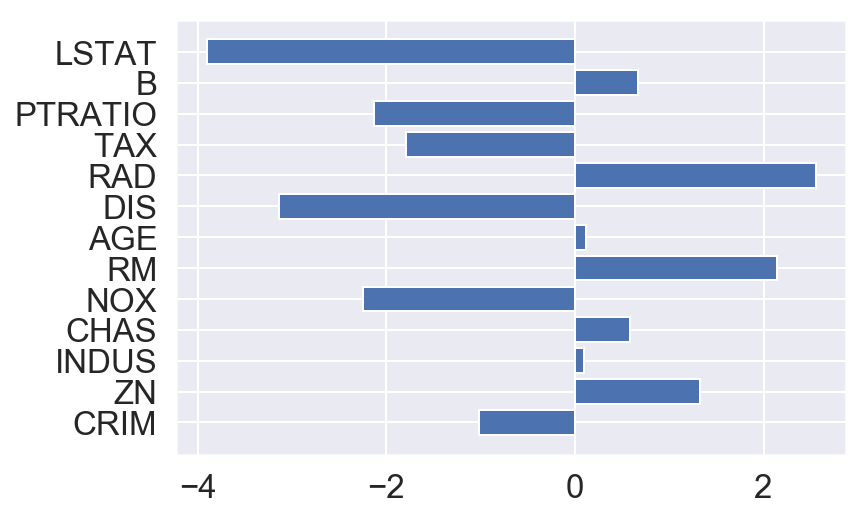

In [15]:
fig, ax = plt.subplots()
ax.barh(data.feature_names, model_reloaded_1.coef_)
plt.show()

In [16]:
fig.savefig('coefficients.pdf', bbox_inches='tight')

## Create a python script

Copy the above steps into a python file and execute it.

- Create a file ending with .py and open it with a text editor (e.g. jupyter notebook).
- Make sure to not include any magic commands in the script.
- Run the script with 

```python 
python myfile.py
```

- How can you check that it worked?
- Where do print statements go?
- What happens if you import the script in your notebook (without py-extension) like

```python
import myfile
```

In [22]:
import test
# you can't reload this again, so you will need importlib in order to this

## Run a python script in the notebook

You can run a python script in a notebook in various ways.

In [23]:
%run script_with_argument.py hello

hello


<Figure size 432x288 with 0 Axes>

### Explain what `script_with_argument.py` is doing

- What is `sys` and what is `argv`?
- How could this structure be useful?

In [ ]:
# it's printing the argument at position 1, not at pos 0 as that'd be it's own name you typed before it.
# this is useful because 

### Explain what `script_with_main.py` is doing

Try the following:

- Execute the script directly
- Import the script and run its function

In [18]:
!python script_with_main.py

Running script directly:
Hello world!

This is our name space:
__main__

Good bye!


In [19]:
import script_with_main

In [20]:
script_with_main.my_function()

Hello world!

This is our name space:
script_with_main



'Good bye!'